<a href="https://colab.research.google.com/github/anisaAnya/coursework/blob/master/cats_and_dogs_classifier_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

import os

# import module we'll need to import our custom module
from shutil import copyfile

# copy our file into the working directory (make sure it has .py suffix)
#copyfile(src = "view_helper.py", dst = "working/view_helper.py")

# import all our functions
import view_helper as helper

# Any results you write to the current directory are saved as output.

In [0]:
#!wget http://files.fast.ai/data/dogscats.zip
!unzip -q test.zip

In [0]:
print(os.listdir("dogscats"))

['test1', 'train', 'models', 'valid', 'sample']


In [0]:
!pip install torchvision

In [0]:
data_dir = 'dogscats'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/valid', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


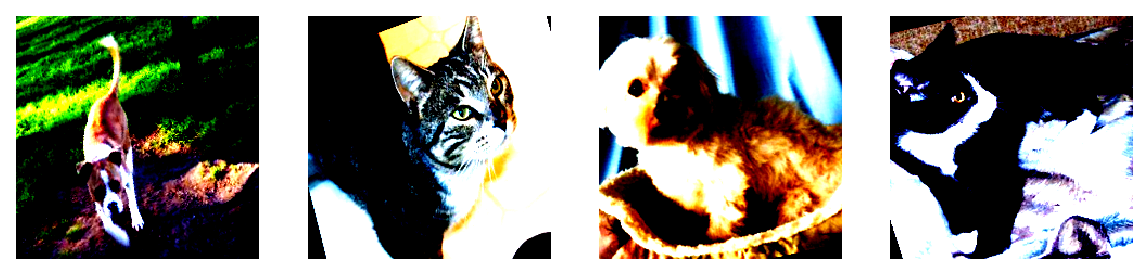

In [0]:
# change this to the trainloader or testloader 
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,10), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

In [0]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.
                                 (0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
32342954it [00:00, 77687665.34it/s]


In [0]:
torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cuda')

In [0]:
# epochs = 1
# steps = 0
# running_loss = 0
# print_every = 5
# for epoch in range(epochs):
#     for inputs, labels in trainloader:
#         steps += 1
#         # Move input and label tensors to the default device
#         inputs, labels = inputs.to(device), labels.to(device)
        
#         optimizer.zero_grad()
        
#         logps = model.forward(inputs)
#         loss = criterion(logps, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
        
#         if steps % print_every == 0:
#             test_loss = 0
#             accuracy = 0
#             model.eval()
#             with torch.no_grad():
#                 for inputs, labels in testloader:
#                     inputs, labels = inputs.to(device), labels.to(device)
#                     logps = model.forward(inputs)
#                     batch_loss = criterion(logps, labels)
                    
#                     test_loss += batch_loss.item()
                    
#                     # Calculate accuracy
#                     ps = torch.exp(logps)
#                     top_p, top_class = ps.topk(1, dim=1)
#                     equals = top_class == labels.view(*top_class.shape)
#                     accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
#             print(f"Epoch {epoch+1}/{epochs}.. "
#                   f"Train loss: {running_loss/print_every:.3f}.. "
#                   f"Test loss: {test_loss/len(testloader):.3f}.. "
#                   f"Test accuracy: {accuracy/len(testloader):.3f}")
#             running_loss = 0
#             model.train()

In [0]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

In [0]:
torch.save(model.state_dict(), 'cat_dog_dense121.pth')

In [0]:
#print(os.listdir(""))
#print(os.listdir("../input/cat-dog-dense121-local"))

In [0]:
ls

Cat_Dog_data.zip                cat_dog_dense121.pth  sample_data/
cat_dog_dense121_local.pth      dogscats/             test.zip
cat_dog_dense121_local.pth.zip  __pycache__/          view_helper.py


In [0]:
state_dict = torch.load('cat_dog_dense121_local.pth')
print(state_dict.keys())

odict_keys(['features.conv0.weight', 'features.norm0.weight', 'features.norm0.bias', 'features.norm0.running_mean', 'features.norm0.running_var', 'features.norm0.num_batches_tracked', 'features.denseblock1.denselayer1.norm1.weight', 'features.denseblock1.denselayer1.norm1.bias', 'features.denseblock1.denselayer1.norm1.running_mean', 'features.denseblock1.denselayer1.norm1.running_var', 'features.denseblock1.denselayer1.norm1.num_batches_tracked', 'features.denseblock1.denselayer1.conv1.weight', 'features.denseblock1.denselayer1.norm2.weight', 'features.denseblock1.denselayer1.norm2.bias', 'features.denseblock1.denselayer1.norm2.running_mean', 'features.denseblock1.denselayer1.norm2.running_var', 'features.denseblock1.denselayer1.norm2.num_batches_tracked', 'features.denseblock1.denselayer1.conv2.weight', 'features.denseblock1.denselayer2.norm1.weight', 'features.denseblock1.denselayer2.norm1.bias', 'features.denseblock1.denselayer2.norm1.running_mean', 'features.denseblock1.denselayer2

In [0]:
model.load_state_dict(state_dict)
model

In [0]:
def test_on_single():
  test_data = datasets.ImageFolder('test', transform=test_transforms)
  trainloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)
  
  testloader = torch.utils.data.DataLoader(test_data, batch_size=64)
  
  model.to('cpu')
  model.eval()

  data_iter = iter(testloader)

  images, labels = next(data_iter)
  fig, axes = plt.subplots(figsize=(10,10), ncols=4)

  #for ii in range(4):
   # ax = axes[ii]
    #helper.imshow(images[ii], ax=ax, normalize=False)
    
  with torch.no_grad():
    output = model.forward(images)

  ps = torch.exp(output)
  probability = ps[0].data.numpy().squeeze()
  print(probability)

[0.99869215 0.00130777]


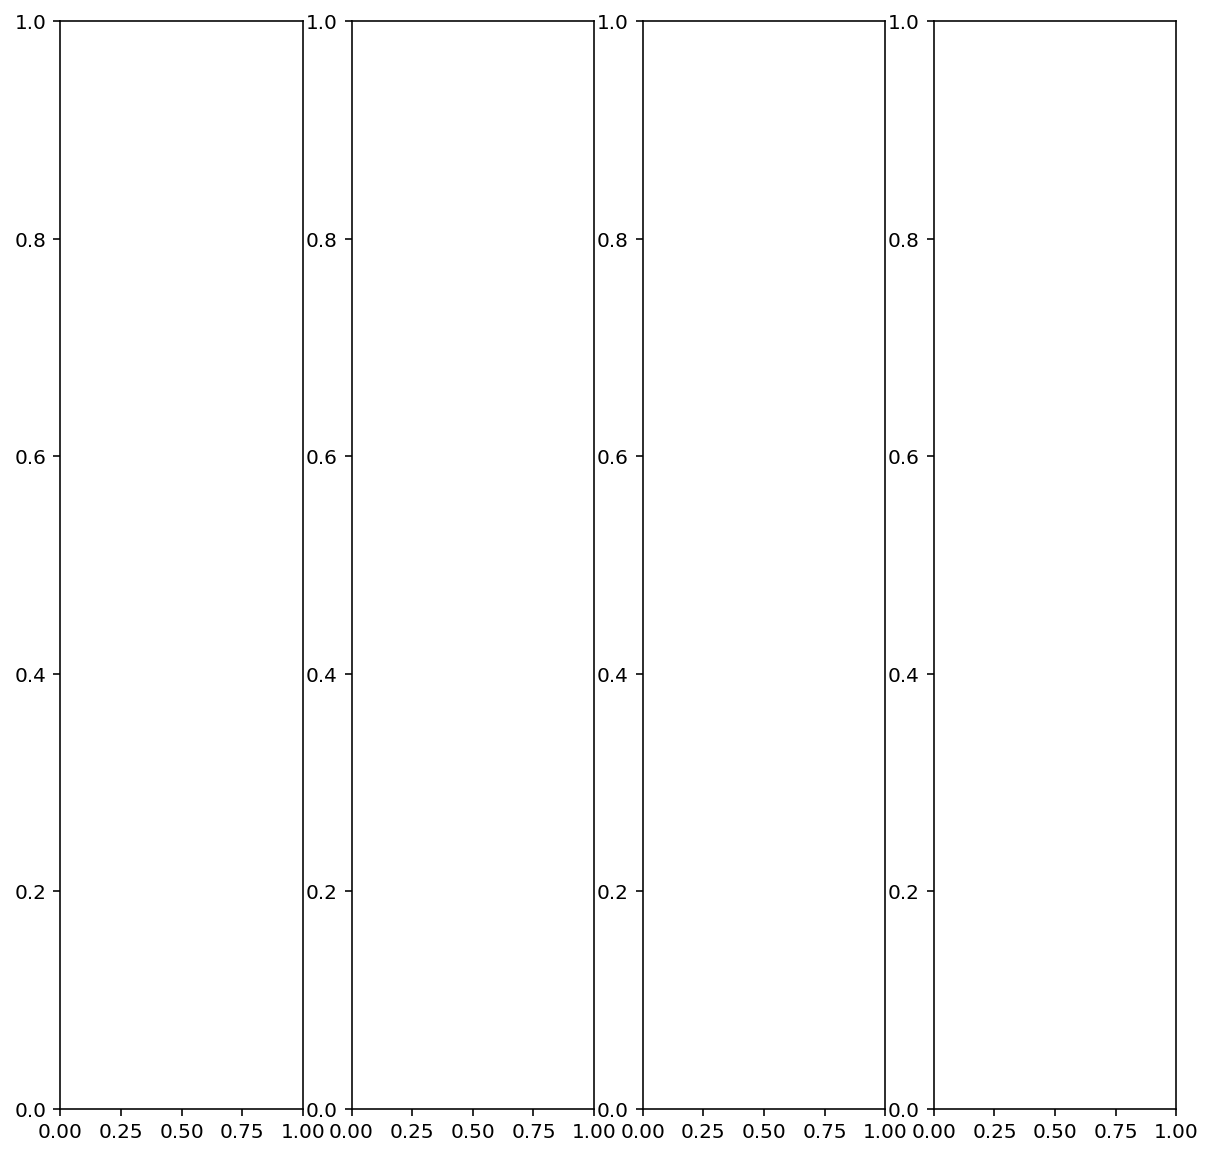

In [0]:
#!ls 
test_on_single()
#!unzip test.zip

In [0]:
torch.save(model.state_dict(),'test.pth')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


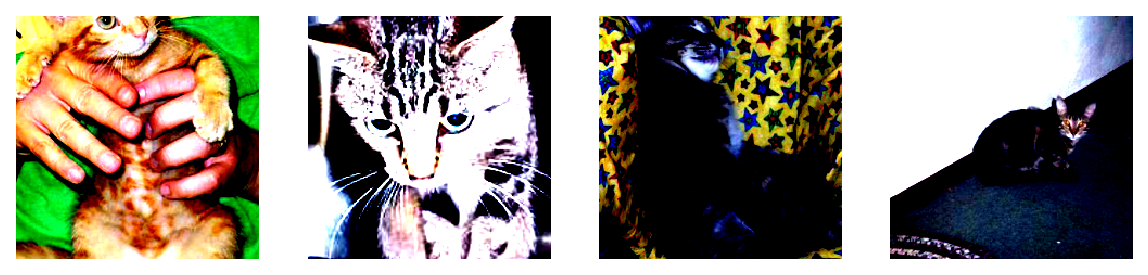

In [0]:

# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,10), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

## Test the Network

In [0]:
model.to('cpu')
model.eval()

data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,10), ncols=4)

for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

In [0]:
with torch.no_grad():
    output = model.forward(images)

ps = torch.exp(output)

In [0]:
random_img = np.random.randint(64, size=1)[0]
random_img

In [0]:
# get the probability
probability = ps[random_img].data.numpy().squeeze()
probability

In [0]:
helper.imshow(images[random_img], normalize=False)

In [0]:
ind = np.arange(2)
labels = ['Cat', 'Dog',]
width = 0.35
locations = ind

class_probability = plt.barh(ind, probability, width, alpha=.7, label='Cats vs Dogs')

plt.yticks(np.arange(10))
plt.title('Class Probability')
plt.yticks(locations, labels)

#legend
plt.legend()
plt.ylim(top=3)
plt.ylim(bottom=-2)
plt.show();